# Research Software in Brazil - Complementary Material

This complementary materials has the source code for the data analyse and data visualisation used on the paper "Research Software in Brazil".

## Loading Packages

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
from matplotlib import pyplot

## Configuring matplotlib

In [2]:
matplotlib.style.use('ggplot')

## Help functions

In [3]:
def software_csv_list_cleaner(serie):
    """Data clean for list of used software."""
    serie = serie.loc[~serie.isnull()]  # remove null lines
    serie = serie.apply(lambda row: row.replace("\n", ","))  # replace line separated values with comma separated values
    data = pd.concat(
        [
            pd.Series(
                item.split(',')
            ) for _, item in serie.iteritems()
        ]
    )
    data = data.apply(lambda row: row.lower().strip())  # remove leading and trailing removed.
    data = data[~data.isin(["etc.", ""])]  # remove some strange words
    return data.value_counts(normalize=True)

def plot_bar(dataframe, **kargs):
    """Create bar plot."""
    plot = dataframe.plot(
        kind="bar"
    )
    plot.set_title(kargs["title"] if "title" in kargs else dataframe.name)
    plot.figure.autolayout = True
    plot.figure.savefig(
        kargs["filename"] if "filename" in kargs else "plot.png",
        dpi=300,
        bbox_inches="tight"
    )
    
def plot__multiple_bar(br=None, uk=None, **kargs):
    """Create multiple bar plot."""
    plot = pd.DataFrame(
        {
            "Brazil": br,
            "UK": uk,
        }
    ).plot(
        kind="bar"
    )
    # X label
    if "xticklabels" in kargs:
        plot.set_xticklabels(kargs["xticklabels"])
    # Y label
    plot.set_ylabel('Relative frequency of answers')
    # Title
    plot.set_title(kargs["title"] if "title" in kargs else dataframe.name)
    # Others
    plot.figure.autolayout = True
    # Save
    plot.figure.savefig(
        kargs["filename"] if "filename" in kargs else "plot.png",
        dpi=300,
        bbox_inches="tight"
    )
    
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

def plot_pie(dataframe, **kargs):
    """Create pie plot."""
    plot = dataframe.plot(
        kind='pie',
        autopct=make_autopct(dataframe)
    )
    plot.set_ylabel('')
    plot.set_title(kargs["title"] if "title" in kargs else dataframe.name)
    plot.figure.autolayout = True
    plot.figure.savefig(
        kargs["filename"] if "filename" in kargs else "plot.png",
        dpi=300,
        bbox_inches="tight"
    )

## Load data

In [4]:
data_raw = pd.read_csv("ResearchSoftwareSurvey2017RawEN.csv")

In [5]:
data_raw.columns

Index(['Do you agree with the terms and conditions?',
       'Do you use research software?',
       'Please provide the name(s) of the main research software you use.',
       'Have you received any training in research software that you use?',
       'If you received any training, who did provide the training?',
       'Do you develop your own research software?',
       'Have you received any training in software development?',
       'What would happen if you could no longer use research software?',
       'Have you ever included the cost of research software in a funding proposal?',
       'What is your job title?'],
      dtype='object')

In [6]:
uk_2014_data_raw = pd.read_csv("ResearchSoftwareSurvey2014Raw.csv")

In [7]:
uk_2014_data_raw.columns

Index(['Timestamp', 'Question 1: In which institution are you based?',
       'Question 2: Which of the following roles apply to you?',
       'Question 3: Which of the following disciplines best applies to your work?',
       'Question 4: Which funder currently provides the majority of your funding?',
       'Question 5: How many years have you worked in research?',
       'Question 6: Do you use research software?',
       'Question 7: What would happen if you could no longer use research software?',
       'Question 8: Do you develop your own research software?',
       'Question 9: Have you received any training in software development?',
       'Question 10: Have you ever included costs for software development in a funding proposal?',
       'Question 11: Please provide the name(s) of the main research software you use.',
       'Extra question 1: What is your job title?',
       'Extra question 2: What is your gender?',
       'Extra question 3: Are you employed on a permanent o

We are going to filter the data from "UK Research Software Survey 2014" to make the subject of the group more close with the Brazilian pool.

In [8]:
uk_2014_data_raw = uk_2014_data_raw.loc[
    uk_2014_data_raw.loc[
        :,
        "Question 3: Which of the following disciplines best applies to your work?"
    ] == "Biological, mathematical & physical sciences",
    :
]

## Response poll size

In [9]:
len(data_raw)

32

In [10]:
len(uk_2014_data_raw)

167

## What is your job title?

In [11]:
data_br = data_raw["What is your job title?"].value_counts(normalize=True)
data_br

Professor                0.40625
Undergraduate student    0.18750
PhD student              0.18750
Post Doctoral            0.15625
Master student           0.03125
Unknown                  0.03125
Name: What is your job title?, dtype: float64

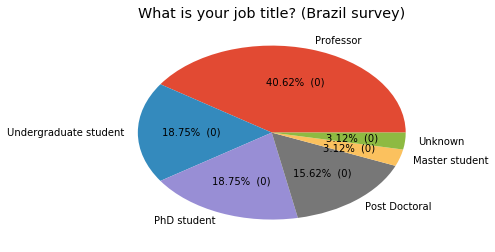

In [12]:
plot_pie(
    data_br,
    title="What is your job title? (Brazil survey)",
    filename="job-title-br.png"
)

In [13]:
def uk_job_title_cleander(serie):
    serie = serie[~serie.isnull()]  # remove null lines
    
    # Begin merge for Professor
    serie = serie.apply(lambda row: "Professor" if row.lower().find("professor") >= 0 else row)
    serie = serie.apply(lambda row: "Professor" if row.lower().find("lecturer") >= 0 else row)
    serie = serie.apply(lambda row: "Professor" if row.lower().find("principal") >= 0 else row)
    serie = serie.apply(lambda row: "Professor" if row.lower().find("chair") >= 0 else row)
    serie = serie.apply(lambda row: "Professor" if row.lower().find("reader") >= 0 else row)
    # End merge for Professor
    # Begin merge for Post Doctoral
    serie = serie.apply(lambda row: "Post Doctoral" if row.lower().find("doctoral") >= 0 else row)
    serie = serie.apply(lambda row: "Post Doctoral" if row.lower().find("fellow") >= 0 else row)
    serie = serie.apply(lambda row: "Post Doctoral" if row.lower().find("postdoc") >= 0 else row)
    serie = serie.apply(lambda row: "Post Doctoral" if row.lower().find("post-doc") >= 0 else row)
    serie = serie.apply(lambda row: "Post Doctoral" if row.lower().find("pdra") >= 0 else row)
    serie = serie.apply(lambda row: "Post Doctoral" if row.lower().find("research") >= 0 else row)
    serie = serie.apply(lambda row: "Post Doctoral" if row.lower().find("ressearch") >= 0 else row)
    serie = serie.apply(lambda row: "Post Doctoral" if row.lower().find("scientist") >= 0 else row)
    # End merge for Post Doctoral
    # Begin merge for PhD
    serie = serie.apply(lambda row: "PhD student" if row.lower().find("phd") >= 0 else row)
    serie = serie.apply(lambda row: "PhD student" if row.lower().find("postgraduate student") >= 0 else row)
    # End merge for PhD
    # Begin merge for Researcher
    serie = serie.apply(lambda row: "Other" if row.lower().find("technician") >= 0 else row)
    serie = serie.apply(lambda row: "Other" if row.lower().find("leader") >= 0 else row)
    # End merge for Researcher
    
    return serie.value_counts(normalize=True)

data_uk = uk_job_title_cleander(uk_2014_data_raw['Extra question 1: What is your job title?'])
data_uk

Post Doctoral    0.448485
Professor        0.363636
PhD student      0.169697
Other            0.018182
Name: Extra question 1: What is your job title?, dtype: float64

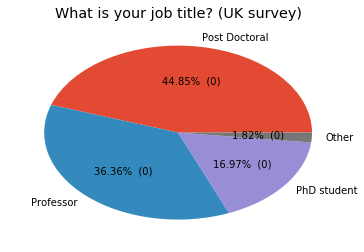

In [14]:
plot_pie(
    data_uk,
    title="What is your job title? (UK survey)",
    filename="job-title-uk.png"
)

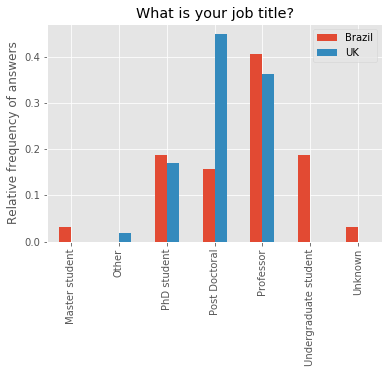

In [15]:
plot__multiple_bar(
    data_br,
    data_uk,
    title="What is your job title?",
    filename="job-title.png"
)

## Do you use research software?

In [16]:
data_br = data_raw["Do you use research software?"].value_counts(normalize=True)
data_br

Yes    0.9375
No     0.0625
Name: Do you use research software?, dtype: float64

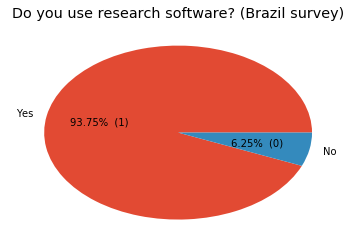

In [17]:
plot_pie(
    data_br,
    title="Do you use research software? (Brazil survey)",
    filename="do-you-use-research-software-br.png"
)

In [18]:
data_uk = uk_2014_data_raw["Question 6: Do you use research software?"].value_counts(normalize=True)
data_uk

Yes    0.958084
No     0.041916
Name: Question 6: Do you use research software?, dtype: float64

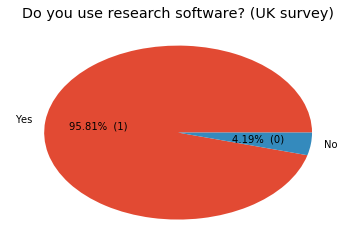

In [19]:
plot_pie(
    data_uk,
    title="Do you use research software? (UK survey)",
    filename="do-you-use-research-software-uk.png"
)

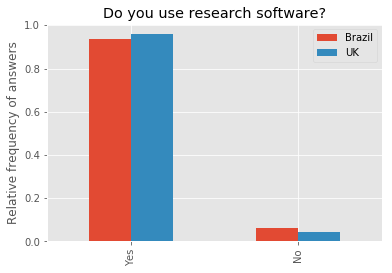

In [20]:
plot__multiple_bar(
    data_br,
    data_uk,
    title="Do you use research software?",
    filename="do-you-use-research-software.png"
)

## What would happen if you could no longer use research software?

In [21]:
data_br = data_raw['What would happen if you could no longer use research software?'].value_counts(normalize=True)
data_br

It would not be practical to conduct my work without software        0.46875
My work would require more effort, but it would still be possible    0.37500
It would make no significant difference to my work                   0.15625
Name: What would happen if you could no longer use research software?, dtype: float64

In [22]:
plot_pie(
    data_br,
    title="What would happen if you could no longer use research software? (Brazil survey)",
    filename="what-would-happen-without-research-software-br.png"
)

In [23]:
data_uk = uk_2014_data_raw['Question 7: What would happen if you could no longer use research software?'].value_counts(normalize=True)
data_uk

It would not be practical to conduct my work without software        0.790419
My work would require more effort, but it would still be possible    0.155689
It would make no significant difference to my work                   0.053892
Name: Question 7: What would happen if you could no longer use research software?, dtype: float64

In [24]:
plot_pie(
    data_uk,
    title="What would happen if you could no longer use research software? (UK survey)",
    filename="what-would-happen-without-research-software-uk.png"
)

In [25]:
plot__multiple_bar(
    data_br,
    data_uk,
    xticklabels=("Not practical", "Require more effort", "No significant difference"),  # to avoid size issue
    title="What would happen if you could no longer use research software?",
    filename="what-would-happen-without-research-software.png"
)

## Have you received any training in research software that you use?

In [26]:
data = data_raw["Have you received any training in research software that you use?"].value_counts(normalize=True)
data

I didn't receive any training.                                       0.62500
I received training for 5% of the research software that I use.      0.15625
I received training for 25% of the research software that I use.     0.12500
I received training for 100% of the research software that I use.    0.03125
I received training for 50% of the research software that I use.     0.03125
I received training for 75% of the research software that I use.     0.03125
Name: Have you received any training in research software that you use?, dtype: float64

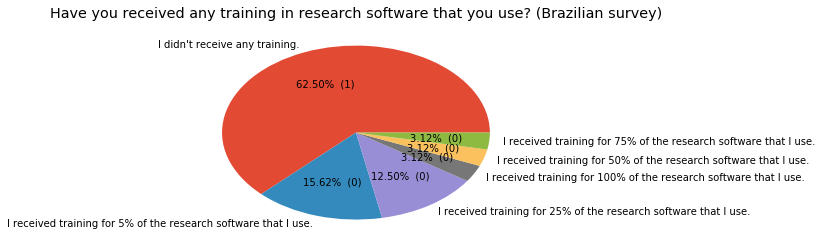

In [27]:
plot_pie(
    data,
    title="Have you received any training in research software that you use? (Brazilian survey)",
    filename="have-you-received-training-br.png"
)

## If you received any training, who did provide the training?

In [28]:
data = data_raw[data_raw["Have you received any training in research software that you use?"] != "I didn't receive any training. "]['If you received any training, who did provide the training?'].value_counts(normalize=True)
data

With a colleague that use the same program.    0.692308
Workshop during a scientific conference.       0.230769
Training company.                              0.076923
Name: If you received any training, who did provide the training?, dtype: float64

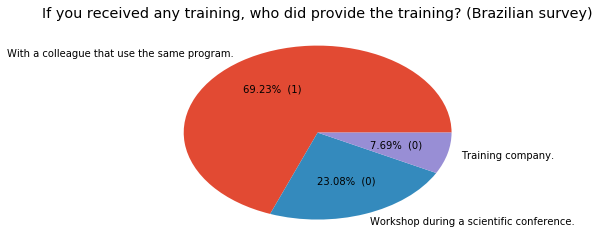

In [29]:
plot_pie(
    data,
    title="If you received any training, who did provide the training? (Brazilian survey)",
    filename="who-did-provide-the-training-br.png"
)

## Do you develop your own research software?

In [30]:
data_br_aux = data_raw['Do you develop your own research software?'].value_counts(normalize=True)
data_br_aux

No     0.5
Yes    0.5
Name: Do you develop your own research software?, dtype: float64

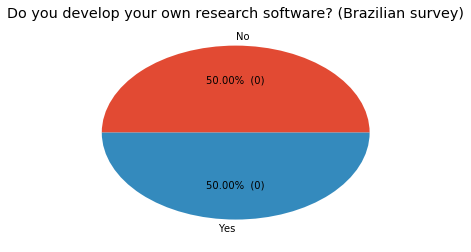

In [31]:
plot_pie(
    data_br_aux,
    title="Do you develop your own research software? (Brazilian survey)",
    filename="do-you-develop-your-software-br.png"
)

In [32]:
data_br = data_raw.loc[data_raw['Do you develop your own research software?'] == "Yes"]["What is your job title?"].value_counts(normalize=True)
data_br

PhD student              0.3125
Professor                0.2500
Undergraduate student    0.1875
Post Doctoral            0.1250
Master student           0.0625
Unknown                  0.0625
Name: What is your job title?, dtype: float64

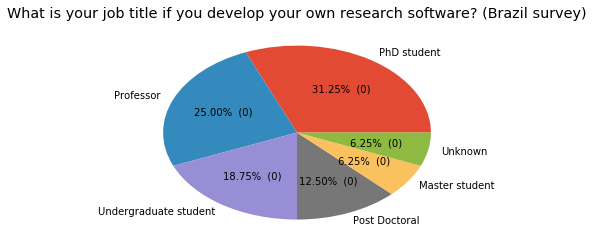

In [33]:
plot_pie(
    data_br,
    title="What is your job title if you develop your own research software? (Brazil survey)",
    filename="job-title-developer-br.png"
)

In [34]:
data_uk_aux = uk_2014_data_raw['Question 8: Do you develop your own research software?'].value_counts(normalize=True)
data_uk_aux

Yes    0.706587
No     0.293413
Name: Question 8: Do you develop your own research software?, dtype: float64

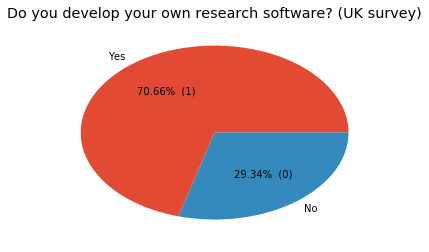

In [35]:
plot_pie(
    data_uk_aux,
    title="Do you develop your own research software? (UK survey)",
    filename="do-you-develop-your-software-uk.png"
)

In [36]:
data_uk = uk_job_title_cleander(uk_2014_data_raw.loc[uk_2014_data_raw['Question 8: Do you develop your own research software?'] == "Yes"]['Extra question 1: What is your job title?'])
data_uk

Professor        0.393162
Post Doctoral    0.384615
PhD student      0.213675
Other            0.008547
Name: Extra question 1: What is your job title?, dtype: float64

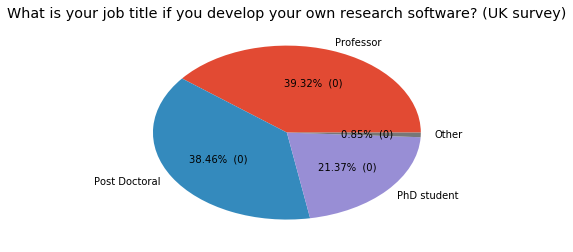

In [37]:
plot_pie(
    data_uk,
    title="What is your job title if you develop your own research software? (UK survey)",
    filename="job-title-developer-uk.png"
)

In [38]:
plot__multiple_bar(
    data_br_aux,
    data_uk_aux,
    title="Do you develop your own research software?",
    filename="do-you-develop-your-software.png"
)

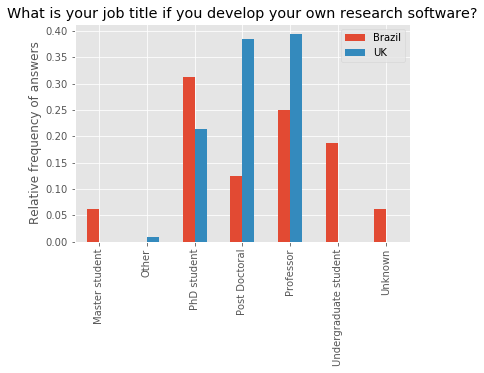

In [39]:
plot__multiple_bar(
    data_br,
    data_uk,
    title="What is your job title if you develop your own research software?",
    filename="job-title-developer.png"
)

## Have you received any training in software development?

In [40]:
data_br = data_raw[data_raw['Do you develop your own research software?'] == "Yes"]['Have you received any training in software development?'].value_counts(normalize=True)
data_br

No     0.533333
Yes    0.466667
Name: Have you received any training in software development?, dtype: float64

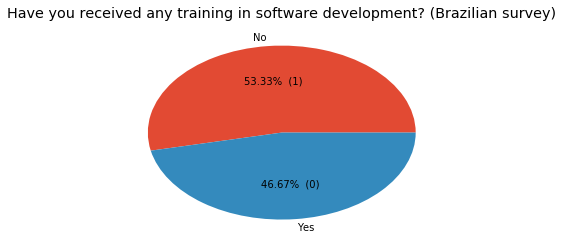

In [41]:
plot_pie(
    data_br,
    title="Have you received any training in software development? (Brazilian survey)",
    filename="have-you-received-training-in-software-development-br.png"
)

In [42]:
data_uk = uk_2014_data_raw[uk_2014_data_raw['Question 8: Do you develop your own research software?'] == "Yes"]['Question 9: Have you received any training in software development?'].value_counts(normalize=True)
data_uk

Yes - self taught using online resources or books                           0.330508
Yes - a taught course, Yes - self taught using online resources or books    0.245763
Yes - a taught course                                                       0.228814
No                                                                          0.194915
Name: Question 9: Have you received any training in software development?, dtype: float64

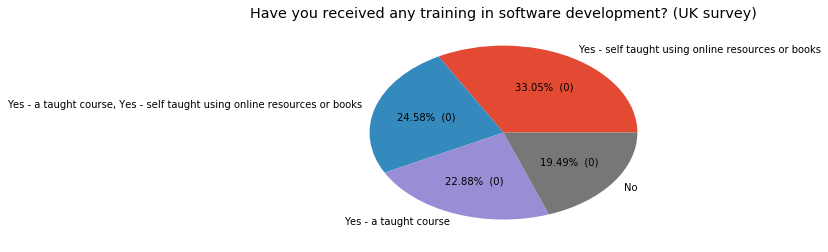

In [43]:
plot_pie(
    data_uk,
    title="Have you received any training in software development? (UK survey)",
    filename="have-you-received-training-in-software-development-uk.png"
)

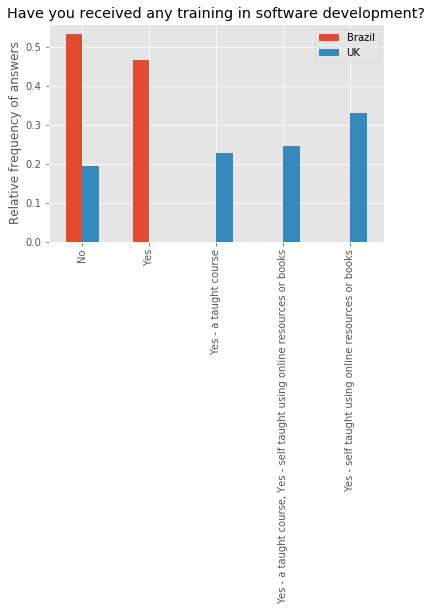

In [44]:
plot__multiple_bar(
    data_br,
    data_uk,
    title="Have you received any training in software development?",
    filename="have-you-received-training-in-software-development.png"
)

## Have you ever included the cost of research software in a funding proposal?

In [45]:
data_br = data_raw['Have you ever included the cost of research software in a funding proposal?'].value_counts(normalize=True)
data_br

No.                                                  0.78125
Yes, to develop a research software.                 0.09375
Yes, to purchase and develop a research software.    0.06250
Yes, to purchase a research software.                0.06250
Name: Have you ever included the cost of research software in a funding proposal?, dtype: float64

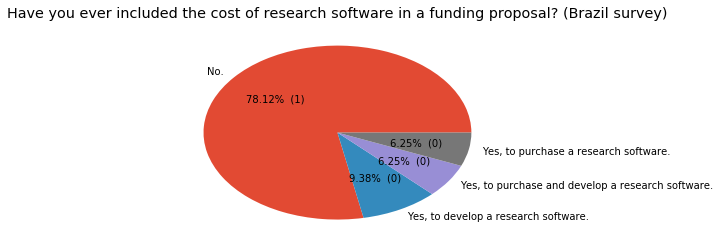

In [46]:
plot_pie(
    data_br,
    title="Have you ever included the cost of research software in a funding proposal? (Brazil survey)",
    filename="have-you-ever-included-software-cost-br.png"
)

In [47]:
data_uk = uk_2014_data_raw['Question 10: Have you ever included costs for software development in a funding proposal?'].value_counts(normalize=True)
data_uk

No                                                                0.323353
I'm not involved in bid writing                                   0.311377
Yes                                                               0.209581
No, but we expected to develop software as part of the project    0.155689
Name: Question 10: Have you ever included costs for software development in a funding proposal?, dtype: float64

In [48]:
plot_pie(
    data_uk,
    title="Have you ever included costs for software development in a funding proposal? (UK survey)",
    filename="have-you-ever-included-software-cost-uk.png"
)

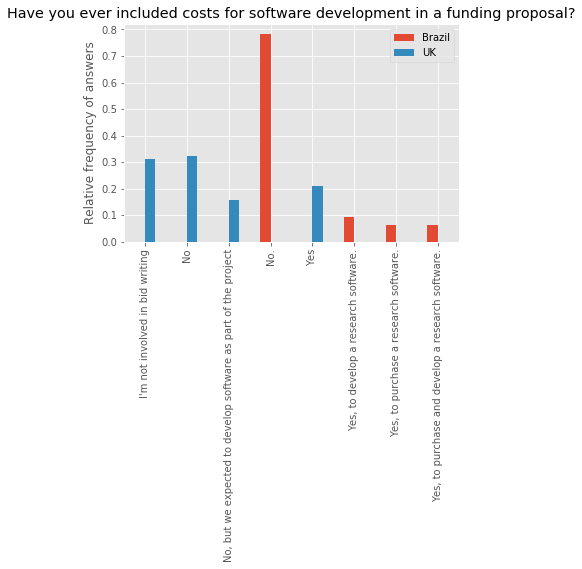

In [49]:
plot__multiple_bar(
    data_br,
    data_uk,
    title="Have you ever included costs for software development in a funding proposal?",
    filename="have-you-ever-included-software-cost.png"
)

## Name of the main research software you use

Because we collect the answer to this question as a text field, the analyse is more challenge. We use `software_csv_list_cleaner` to clean the data.

In [50]:
data = pd.DataFrame(
    {
        "use research software": software_csv_list_cleaner(
            data_raw.loc[
                data_raw["Do you use research software?"] == "Yes",
                "Please provide the name(s) of the main research software you use."   
            ]
        ),
        "develop own software": software_csv_list_cleaner(
            data_raw.loc[
                data_raw['Do you develop your own research software?'] == "Yes",
                "Please provide the name(s) of the main research software you use."   
            ]
        ),
        "include software in bid": software_csv_list_cleaner(
            data_raw.loc[
                data_raw['Have you ever included the cost of research software in a funding proposal?'] != "No",
                "Please provide the name(s) of the main research software you use."   
            ]
        ),
    },
    columns=["use research software", "develop own software", "include software in bid"]
)
data = data.sort_values(by="use research software", ascending=False).head(5)

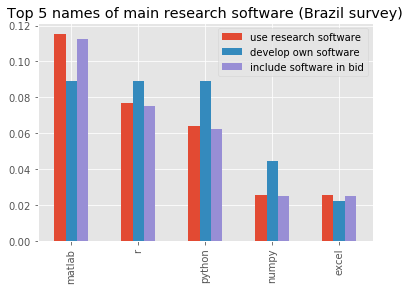

In [51]:
plot_bar(
    data,
    title="Top 5 names of main research software (Brazil survey)",
    filename="name-research-software-br.png"
)

In [52]:
data = pd.DataFrame(
    {
        "use research software": software_csv_list_cleaner(
            uk_2014_data_raw.loc[
                uk_2014_data_raw['Question 6: Do you use research software?'] == "Yes",
                'Question 11: Please provide the name(s) of the main research software you use.'
            ]
        ),
        "develop own software": software_csv_list_cleaner(
            uk_2014_data_raw.loc[
                uk_2014_data_raw['Question 8: Do you develop your own research software?'] == "Yes",
                'Question 11: Please provide the name(s) of the main research software you use.'
            ]
        ),
        "include software in bid": software_csv_list_cleaner(
            uk_2014_data_raw.loc[
                uk_2014_data_raw['Question 10: Have you ever included costs for software development in a funding proposal?'] == "Yes",
                'Question 11: Please provide the name(s) of the main research software you use.'   
            ]
        ),
    },
    columns=["use research software", "develop own software", "include software in bid"]
)
data = data.sort_values(by="use research software", ascending=False).head(5)

In [53]:
plot_bar(
    data,
    title="Top 5 names of main research software (UK survey)",
    filename="name-research-software-uk.png"
)